# Assignment_4

In [ ]:
Student Name :Karthika V
Student Roll Number: 311119106022

# Problem Statement: Customer Segmentation Analysis

# Download and Load the dataset:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [4]:
datas=pd.read_csv(r"C:\Users\Dell\Downloads\Mall_Customers.csv")
datas

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
datas['Age'].mean()

38.85

In [6]:
datas['Age'].median()

36.0

In [7]:
datas['Age'].std()

13.969007331558883

In [8]:
datas['Annual Income (k$)'].value_counts()

54     12
78     12
48      6
71      6
63      6
       ..
58      2
59      2
16      2
64      2
137     2
Name: Annual Income (k$), Length: 64, dtype: int64

# Performing Visualizations

# Univariate Analysis

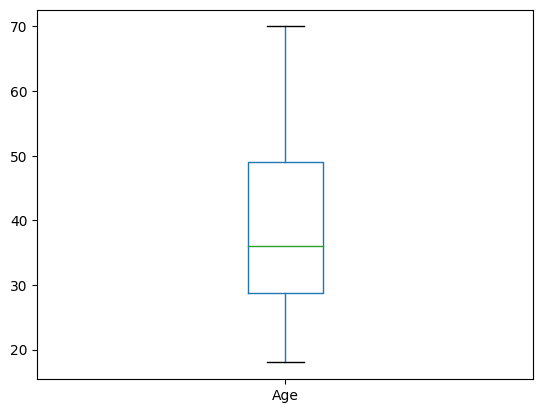

In [9]:
datas.boxplot(column=['Age'],grid=False)
plt.show()

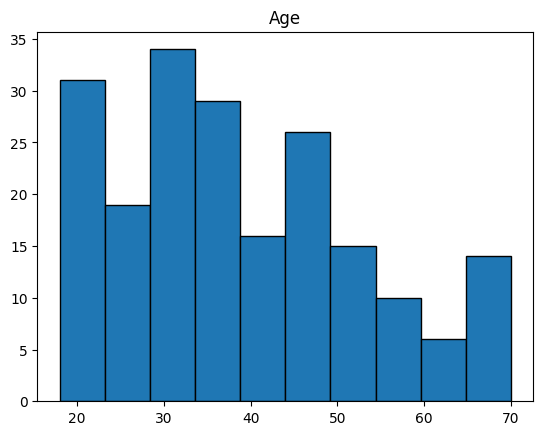

In [10]:
datas.hist(column='Age',grid=False,edgecolor='Black')
plt.show()

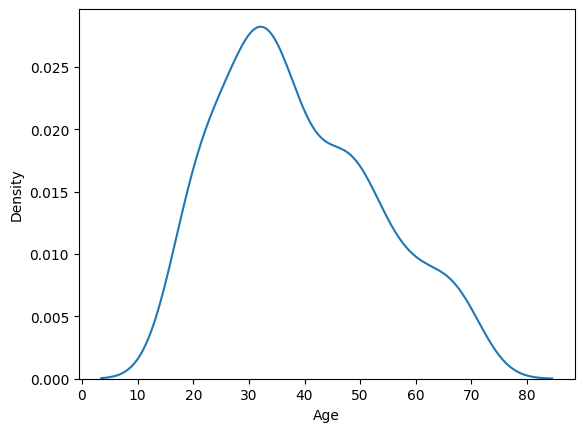

In [11]:
sns.kdeplot(datas['Age'])
plt.show()

# Bi- Variate Analysis

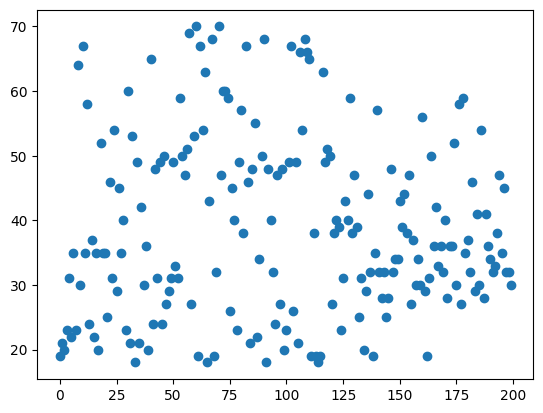

In [12]:
plt.scatter(datas.index,datas['Age'])


In [13]:
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

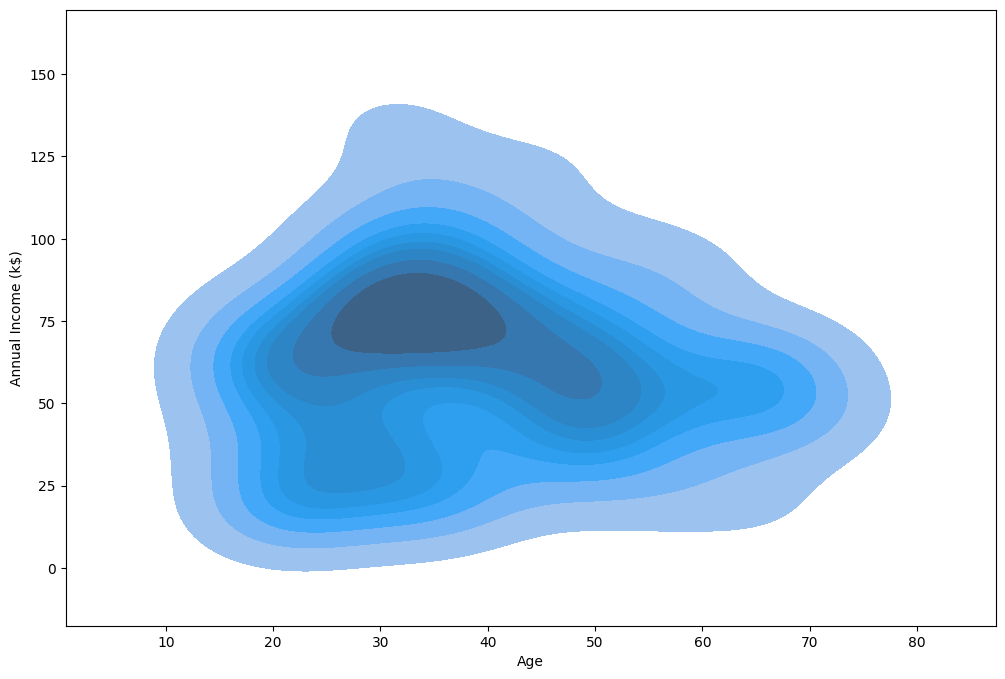

In [14]:
plt.figure(figsize=(12,8))
sns.kdeplot(data=datas,x='Age',y='Annual Income (k$)',fill=True)

In [15]:
plt.show()

# Multi-Variate Analysis

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Age'>

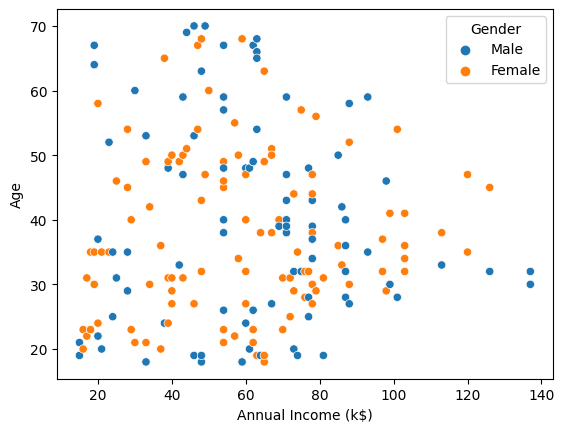

In [27]:
pt= sns.scatterplot(x=datas['Annual Income (k$)'],y=datas['Age'],hue=datas['Gender'])
pt

# Perform descriptive statistics

In [28]:
datas.shape

(200, 5)

In [29]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [30]:
datas.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [31]:
datas.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [32]:
datas["Annual Income (k$)"].skew()

0.3218425498619055

In [33]:
datas["Annual Income (k$)"].kurt()

-0.09848708652696203

In [34]:
quantile = datas["Age"].quantile(q=[0.75,0.25])
quantile

0.75    49.00
0.25    28.75
Name: Age, dtype: float64

C:\Users\Dell\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


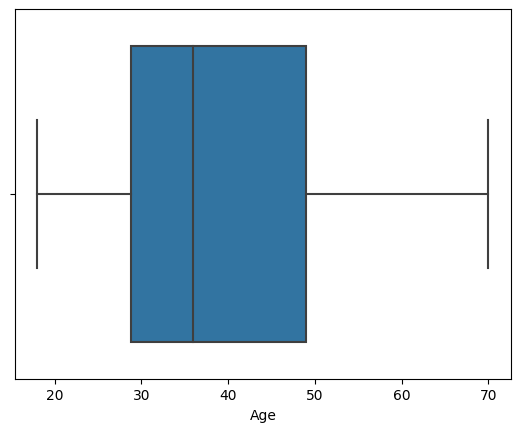

In [35]:
sns.boxplot(datas["Age"])
plt.show()

# Handeling Missing values


In [36]:
print(datas.isnull())

     CustomerID  Gender    Age  Annual Income (k$)  Spending Score (1-100)
0         False   False  False               False                   False
1         False   False  False               False                   False
2         False   False  False               False                   False
3         False   False  False               False                   False
4         False   False  False               False                   False
..          ...     ...    ...                 ...                     ...
195       False   False  False               False                   False
196       False   False  False               False                   False
197       False   False  False               False                   False
198       False   False  False               False                   False
199       False   False  False               False                   False

[200 rows x 5 columns]


In [37]:
datas.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Find the outliers and replace them outliers

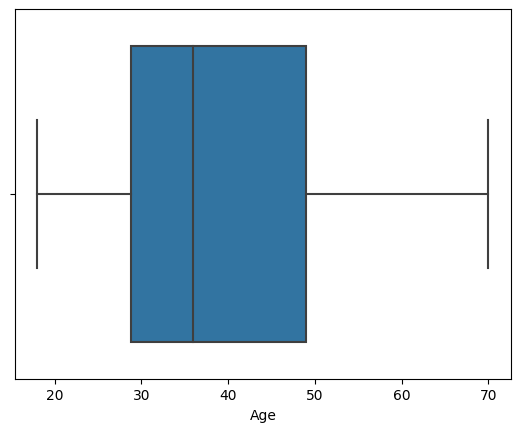

In [38]:
x=sns.boxplot(x=datas["Age"])
plt.show()

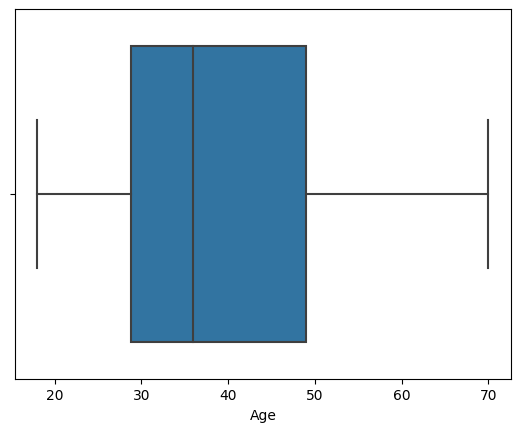

In [39]:
x=datas.Age
sns.boxplot(x=x)
plt.show()

# Check for Categorical columns and perform encoding.

In [40]:
import warnings
warnings.filterwarnings('ignore')
x=pd.Categorical(datas["Annual Income (k$)"])
x

[15, 15, 16, 16, 17, ..., 120, 126, 126, 137, 137]
Length: 200
Categories (64, int64): [15, 16, 17, 18, ..., 113, 120, 126, 137]

In [41]:
pd.get_dummies(datas).head(10)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0
5,6,22,17,76,1,0
6,7,35,18,6,1,0
7,8,23,18,94,1,0
8,9,64,19,3,0,1
9,10,30,19,72,1,0


# Split the data into dependent and independent variables

In [42]:
X= datas.iloc[:,:-1].values
X

array([[1, 'Male', 19, 15],
       [2, 'Male', 21, 15],
       [3, 'Female', 20, 16],
       [4, 'Female', 23, 16],
       [5, 'Female', 31, 17],
       [6, 'Female', 22, 17],
       [7, 'Female', 35, 18],
       [8, 'Female', 23, 18],
       [9, 'Male', 64, 19],
       [10, 'Female', 30, 19],
       [11, 'Male', 67, 19],
       [12, 'Female', 35, 19],
       [13, 'Female', 58, 20],
       [14, 'Female', 24, 20],
       [15, 'Male', 37, 20],
       [16, 'Male', 22, 20],
       [17, 'Female', 35, 21],
       [18, 'Male', 20, 21],
       [19, 'Male', 52, 23],
       [20, 'Female', 35, 23],
       [21, 'Male', 35, 24],
       [22, 'Male', 25, 24],
       [23, 'Female', 46, 25],
       [24, 'Male', 31, 25],
       [25, 'Female', 54, 28],
       [26, 'Male', 29, 28],
       [27, 'Female', 45, 28],
       [28, 'Male', 35, 28],
       [29, 'Female', 40, 29],
       [30, 'Female', 23, 29],
       [31, 'Male', 60, 30],
       [32, 'Female', 21, 30],
       [33, 'Male', 53, 33],
       [34, 'Mal

In [138]:
Y= datas.iloc[:,-1].values
Y

array([39, 81,  6, 77, 40, 76,  6, 94,  3, 72, 14, 99, 15, 77, 13, 79, 35,
       66, 29, 98, 35, 73,  5, 73, 14, 82, 32, 61, 31, 87,  4, 73,  4, 92,
       14, 81, 17, 73, 26, 75, 35, 92, 36, 61, 28, 65, 55, 47, 42, 42, 52,
       60, 54, 60, 45, 41, 50, 46, 51, 46, 56, 55, 52, 59, 51, 59, 50, 48,
       59, 47, 55, 42, 49, 56, 47, 54, 53, 48, 52, 42, 51, 55, 41, 44, 57,
       46, 58, 55, 60, 46, 55, 41, 49, 40, 42, 52, 47, 50, 42, 49, 41, 48,
       59, 55, 56, 42, 50, 46, 43, 48, 52, 54, 42, 46, 48, 50, 43, 59, 43,
       57, 56, 40, 58, 91, 29, 77, 35, 95, 11, 75,  9, 75, 34, 71,  5, 88,
        7, 73, 10, 72,  5, 93, 40, 87, 12, 97, 36, 74, 22, 90, 17, 88, 20,
       76, 16, 89,  1, 78,  1, 73, 35, 83,  5, 93, 26, 75, 20, 95, 27, 63,
       13, 75, 10, 92, 13, 86, 15, 69, 14, 90, 32, 86, 15, 88, 39, 97, 24,
       68, 17, 85, 23, 69,  8, 91, 16, 79, 28, 74, 18, 83], dtype=int64)

# Performing Clustering algorithms

In [43]:
from sklearn.cluster import KMeans

In [44]:
X= datas.iloc[:,[3,4]].values

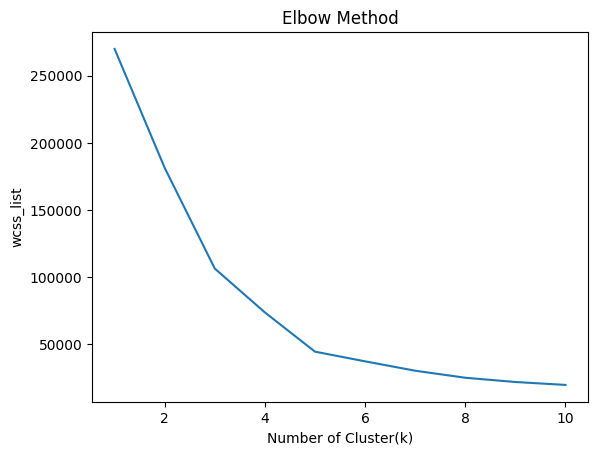

In [45]:
list=[]

for i in range(1,11):
    kmeans =KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    list.append(kmeans.inertia_)
plt.plot(range(1,11),list)
plt.title('Elbow Method')
plt.xlabel('Number of Cluster(k)')
plt.ylabel('wcss_list')
plt.show()

In [46]:
kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
y_predict=kmeans.fit_predict(X)

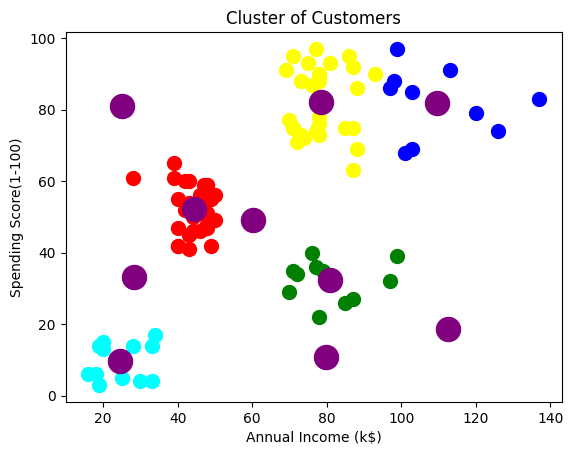

In [47]:
plt.scatter(X[y_predict == 0,0],X[y_predict == 0,1],s=100,c='red',label='Cluster 1')
plt.scatter(X[y_predict == 1,0],X[y_predict == 1,1],s=100,c='green',label='Cluster 2')
plt.scatter(X[y_predict == 2,0],X[y_predict == 2,1],s=100,c='blue',label='Cluster 3')
plt.scatter(X[y_predict == 3,0],X[y_predict == 3,1],s=100,c='cyan',label='Cluster 4')
plt.scatter(X[y_predict == 4,0],X[y_predict == 4,1],s=100,c='yellow',label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='purple',label='Centroid')
plt.title('Cluster of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score(1-100)')
plt.show()

In [48]:
datas['Clusters']=kmeans.labels_
datas.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,Male,19,15,39,8
1,2,Male,21,15,81,7
2,3,Female,20,16,6,3
3,4,Female,23,16,77,7
4,5,Female,31,17,40,8


In [49]:
datas.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
195,196,Female,35,120,79,2
196,197,Female,45,126,28,6
197,198,Male,32,126,74,2
198,199,Male,32,137,18,6
199,200,Male,30,137,83,2


# Split the data into training and testing

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
x= datas.iloc[:,1:7]
x

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,Male,19,15,39,8
1,Male,21,15,81,7
2,Female,20,16,6,3
3,Female,23,16,77,7
4,Female,31,17,40,8
...,...,...,...,...,...
195,Female,35,120,79,2
196,Female,45,126,28,6
197,Male,32,126,74,2
198,Male,32,137,18,6


In [52]:
y= datas.iloc[:,-1]
y

0      8
1      7
2      3
3      7
4      8
      ..
195    2
196    6
197    2
198    6
199    2
Name: Clusters, Length: 200, dtype: int32

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
x_train.shape

(150, 5)

In [54]:
y_train.shape

(150,)

# Training and Testing

In [55]:
x_train

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
114,Female,18,65,48,5
173,Male,36,87,92,4
5,Female,22,17,76,7
126,Male,43,71,35,1
117,Female,49,65,59,5
...,...,...,...,...,...
106,Female,66,63,50,5
14,Male,37,20,13,3
92,Male,48,60,49,5
179,Male,35,93,90,4


In [56]:
x_test

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
95,Male,24,60,52,5
15,Male,22,20,79,7
30,Male,60,30,4,3
158,Male,34,78,1,9
128,Male,59,71,11,9
115,Female,19,65,50,5
69,Female,32,48,47,0
170,Male,40,87,13,9
174,Female,52,88,13,9
45,Female,24,39,65,0


In [57]:
y_train

114    5
173    4
5      7
126    1
117    5
      ..
106    5
14     3
92     5
179    4
102    5
Name: Clusters, Length: 150, dtype: int32

In [58]:
y_test

95     5
15     7
30     3
158    9
128    9
115    5
69     0
170    9
174    9
45     0
66     0
182    6
165    4
78     5
186    6
177    4
56     0
152    9
82     5
68     0
124    1
16     8
148    1
93     5
65     0
60     0
84     5
67     0
125    4
132    1
9      7
18     8
55     0
75     5
150    9
104    5
135    4
137    4
164    1
76     5
79     5
197    2
38     8
24     3
122    5
195    2
29     7
19     7
143    4
86     5
Name: Clusters, dtype: int32

# Build the Model

In [62]:
from sklearn.linear_model import LinearRegression


In [63]:
model = LinearRegression()

In [ ]:
model.score(x_test,y_test)

# Performing using Evaluation Metrics

In [65]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
y_pred=model.predict(x_test)
confusion_matrix(y_test,y_pred)

In [ ]:
print(classification_report(y_test,y_pred))